In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score


## Loading the data

In [2]:
data = pd.read_csv("data/train.csv")

In [3]:
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
data["Name"].apply(lambda s: s.split(",")[0])

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

### Overview of data

In [5]:
data.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

In [6]:
data.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

#### What are the types of the variables ?

In [7]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Are there missing values ?

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### A few examples of plots

In [14]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
sns.countplot(x="Survived", data=data, alpha=0.5)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
# ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.hist(data[data["Survived"] == 0]["Age"].dropna(), label="Did not survived", alpha=0.3)
plt.hist(data[data["Survived"] == 1]["Age"].dropna(), label="Survived", alpha=0.3)
# sets the y axis lable
plt.xlabel("Age")
plt.ylabel("Relative number of persons")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Age distribution")
plt.legend()

ax3 = plt.subplot2grid((2,3),(0,2))
data.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(data.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
data.Age[data.Pclass == 1].plot(kind='kde')    
data.Age[data.Pclass == 2].plot(kind='kde')
data.Age[data.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
data.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(data.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

Text(0.5, 1.0, 'Passengers per boarding location')

#### Compare distribution of variables regarding the target

#### comparing distributions for numerical variables

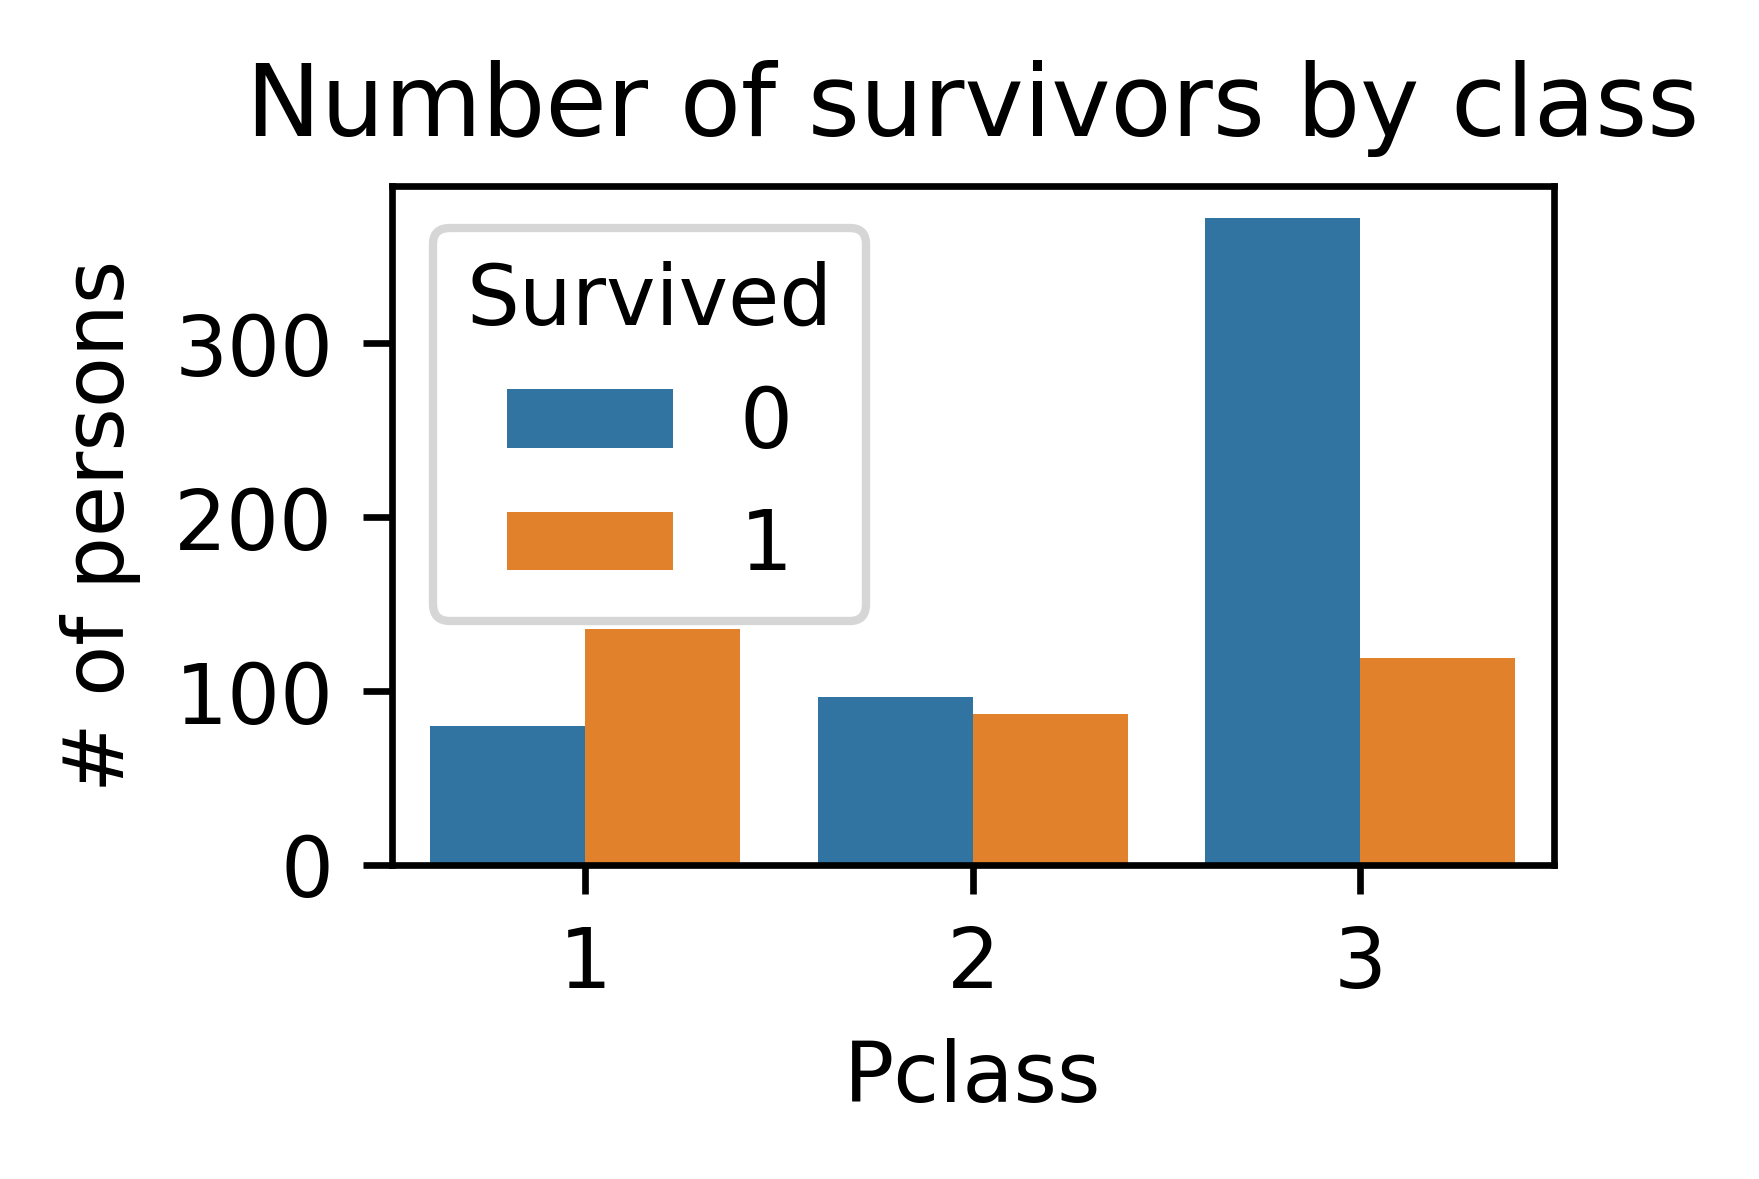

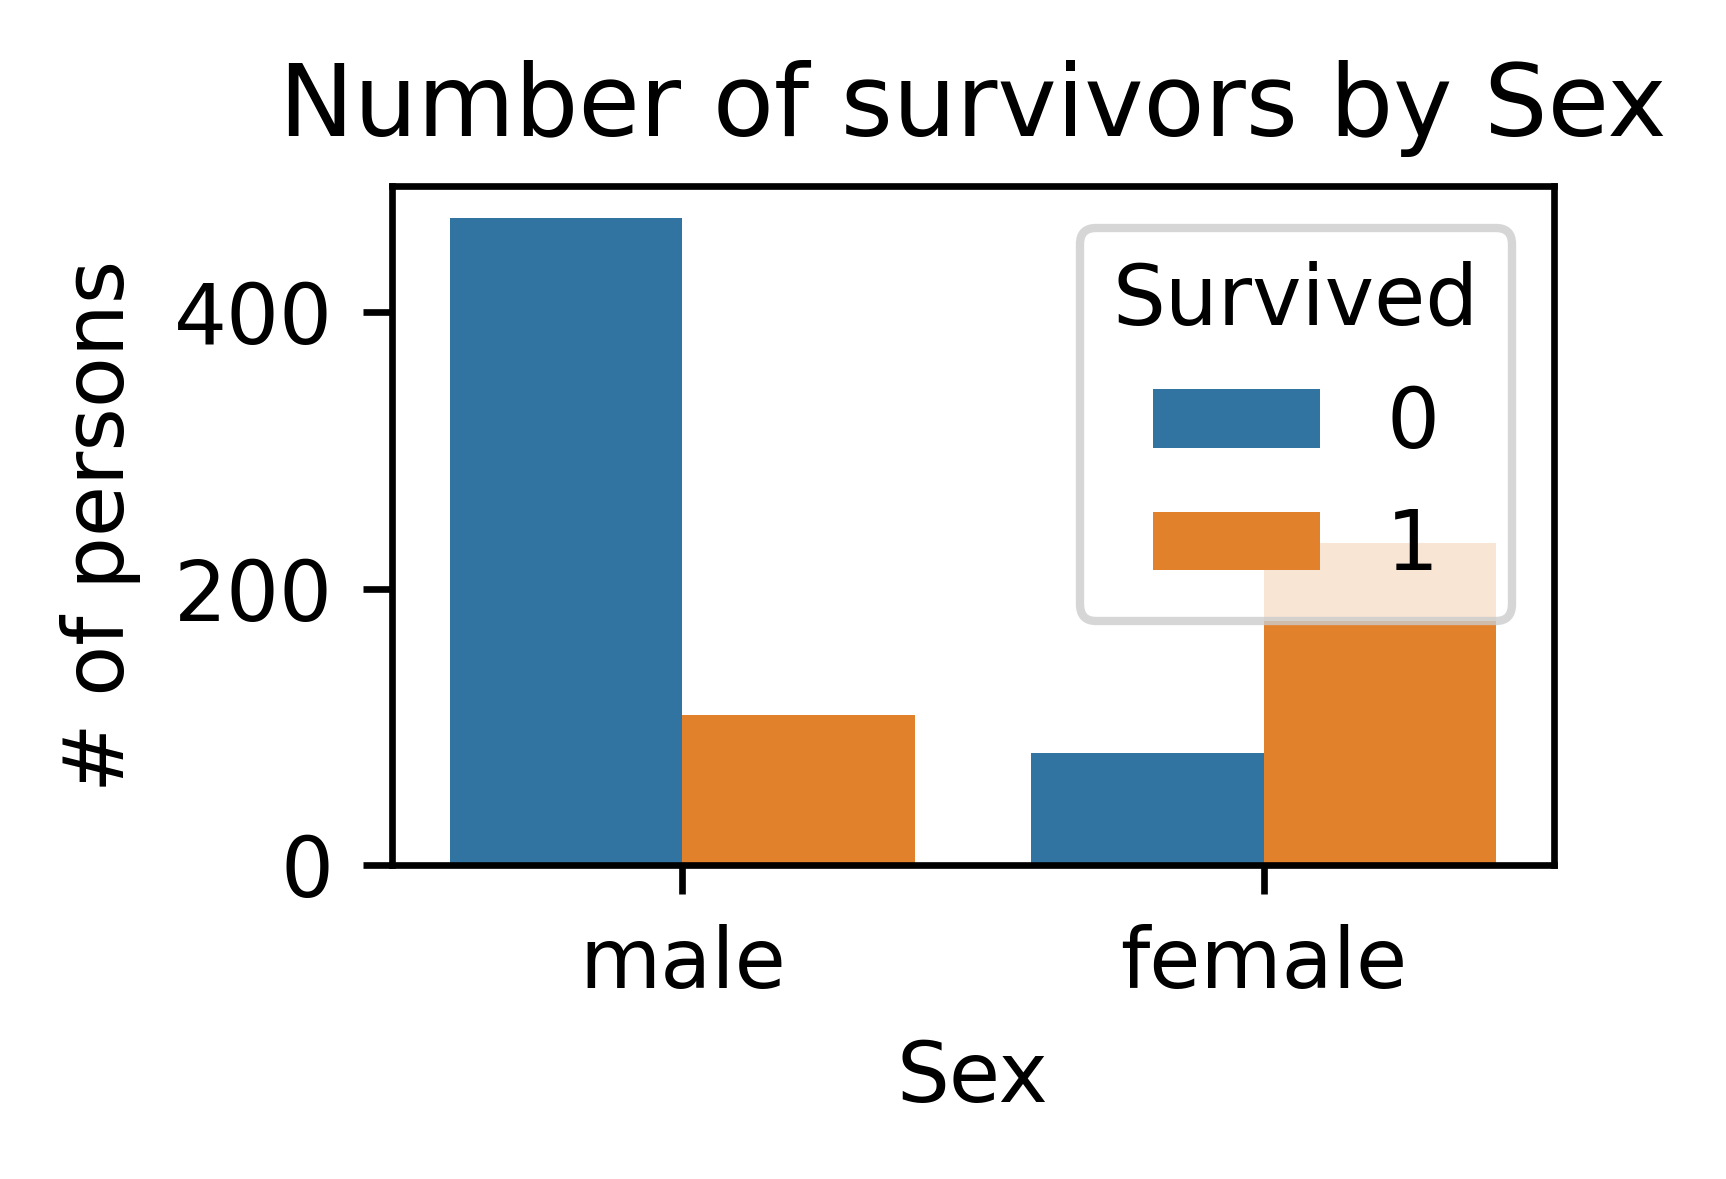

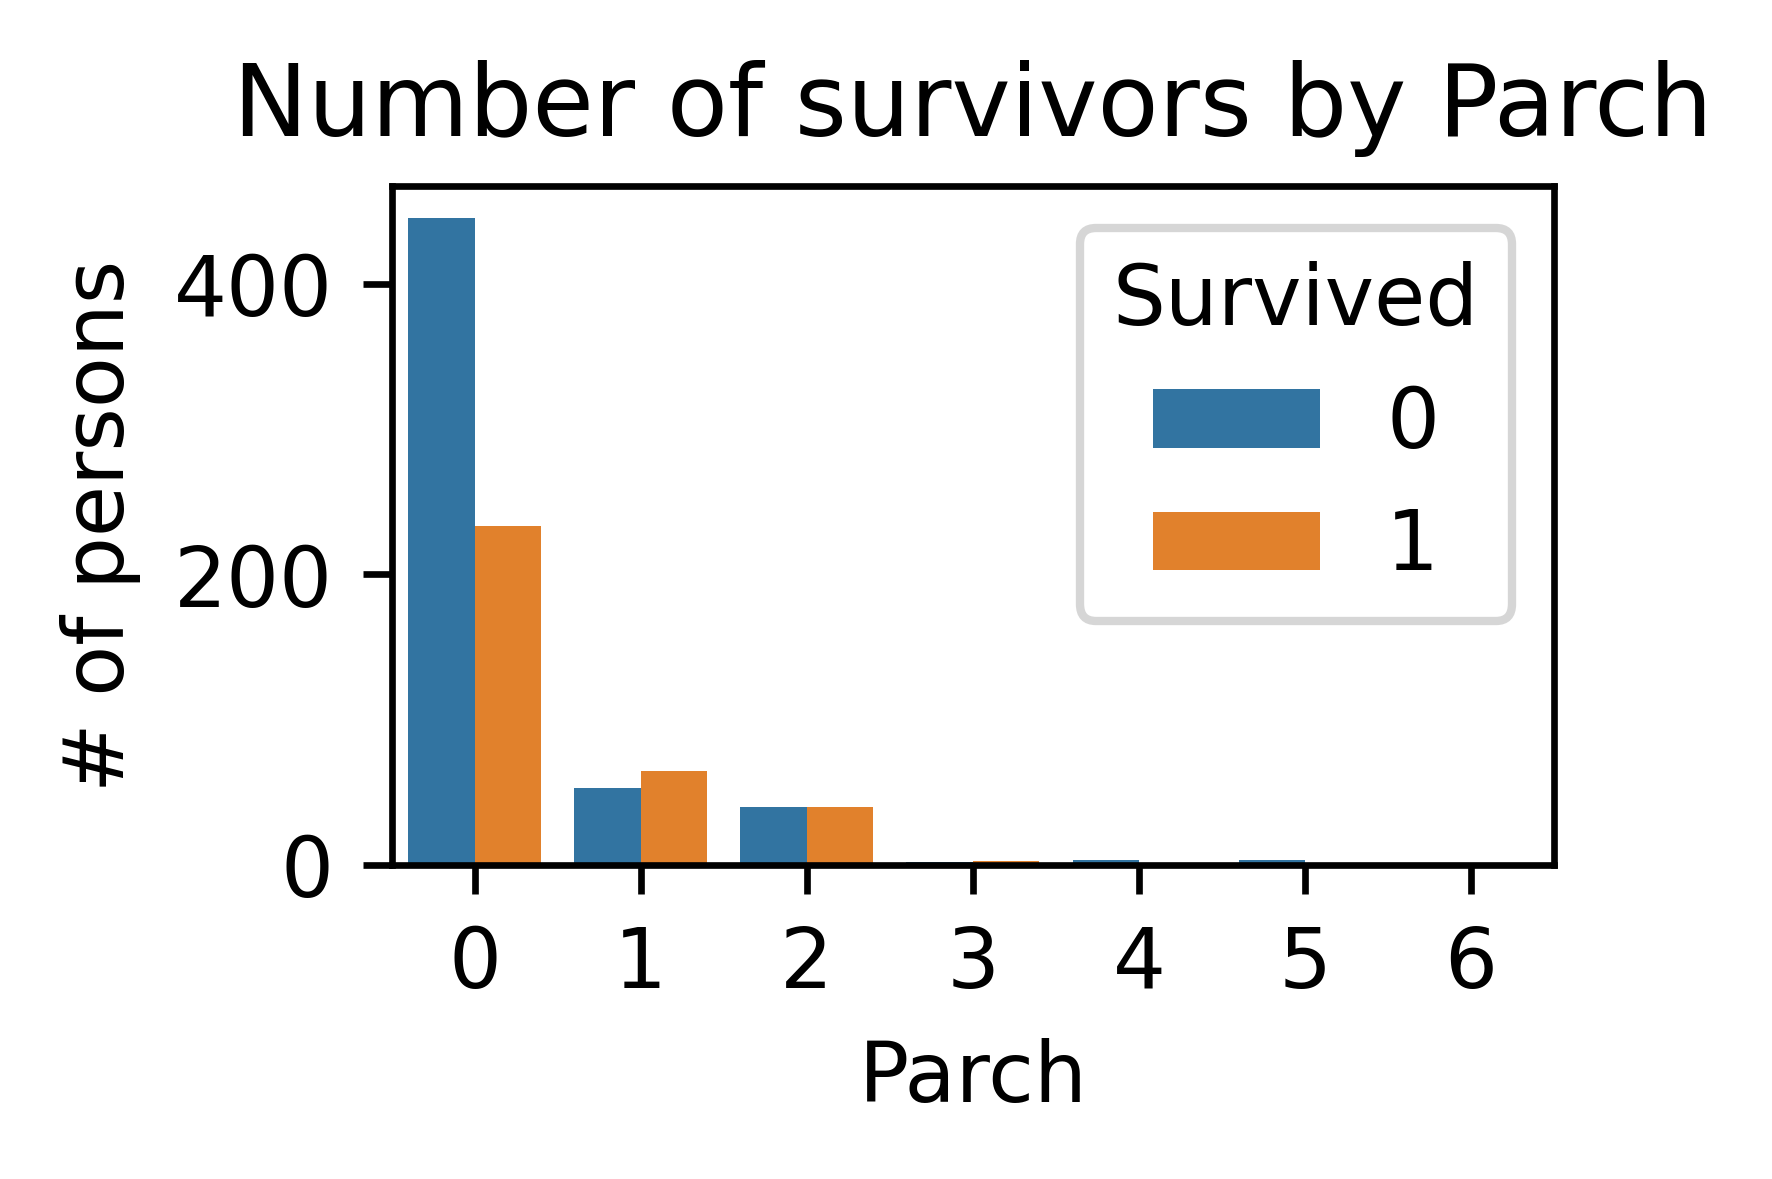

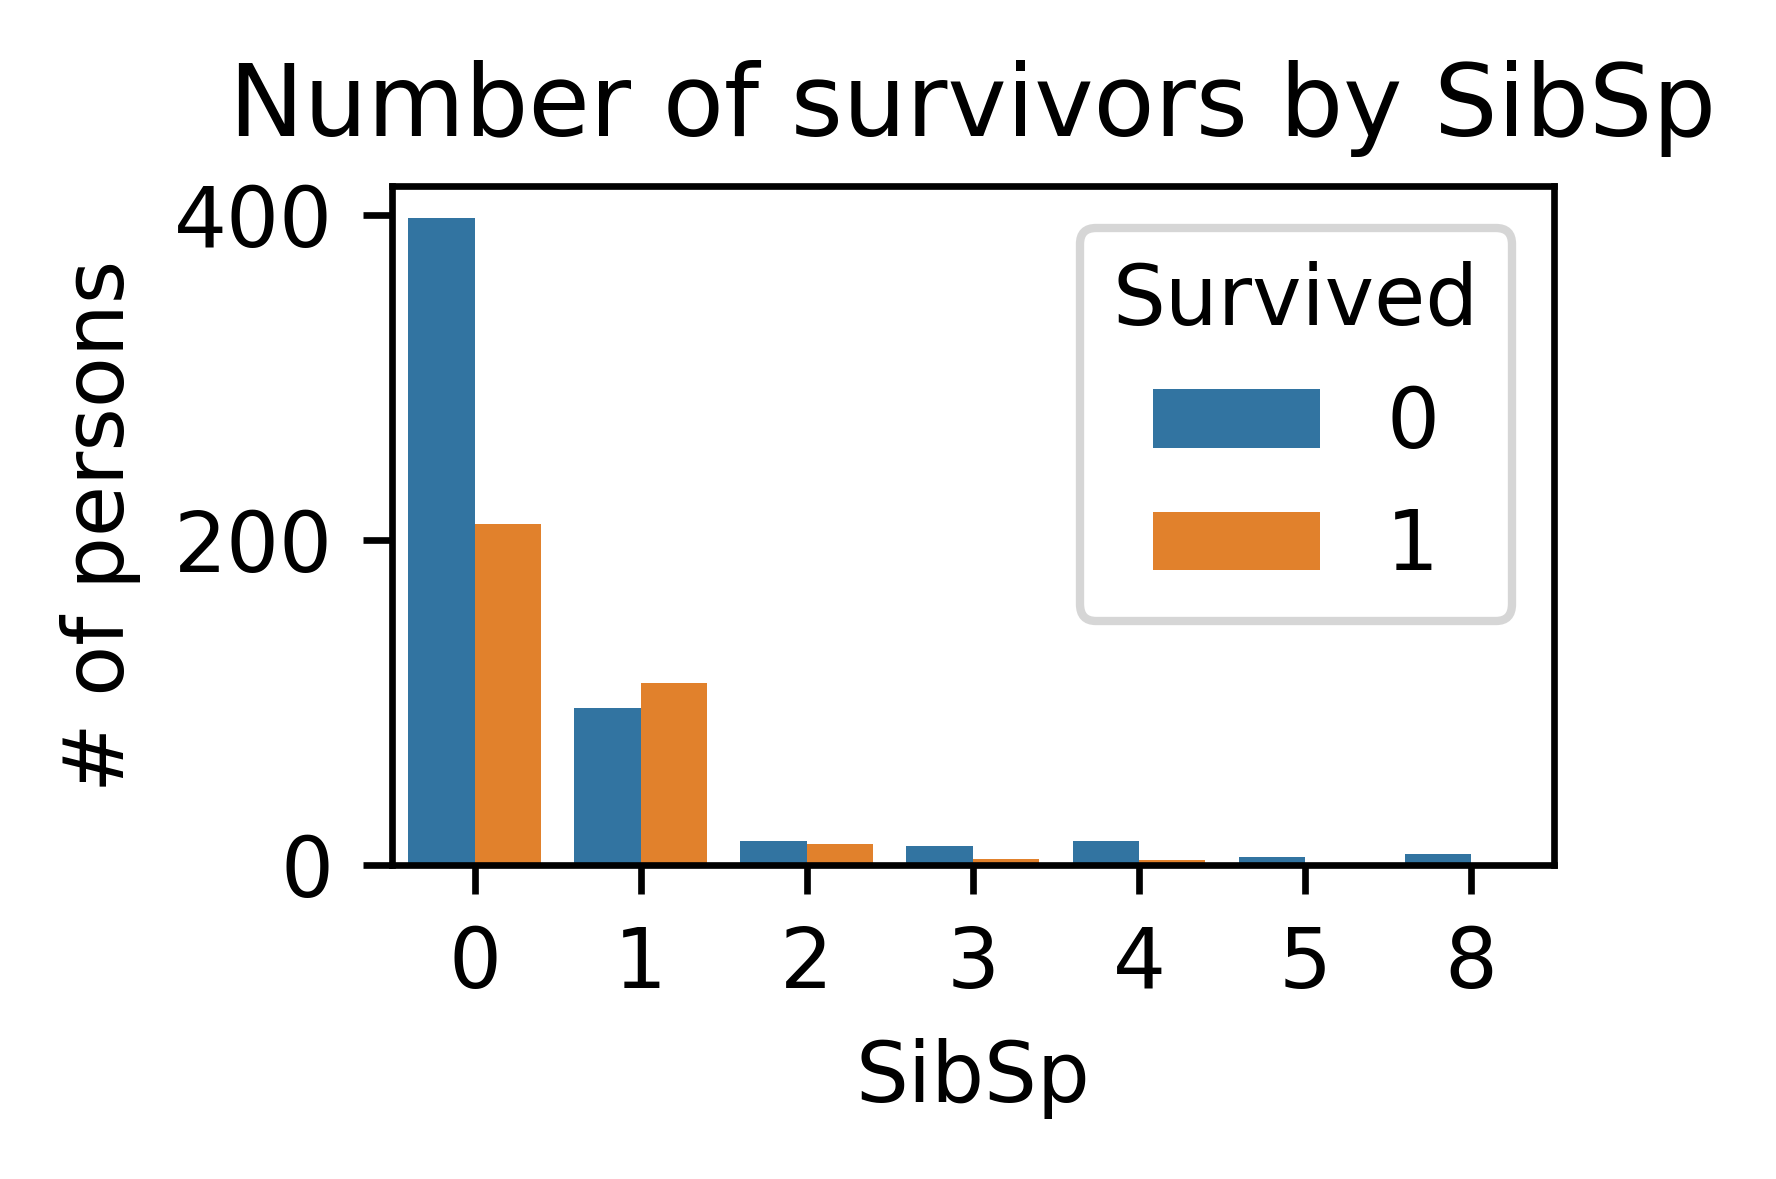

In [15]:
fig = plt.figure(figsize=(2.5,1.5), dpi=600) 
sns.countplot(x="Pclass", hue="Survived", data=data)
plt.ylabel('# of persons')
plt.title("Number of survivors by class")
plt.legend(loc="upper left", title="Survived")

fig = plt.figure(figsize=(2.5,1.5), dpi=600) 
sns.countplot(x="Sex", hue="Survived", data=data)
plt.ylabel('# of persons')
plt.title("Number of survivors by Sex")
plt.legend(loc="upper right", title="Survived")

fig = plt.figure(figsize=(2.5,1.5), dpi=600) 
sns.countplot(x="Parch", hue="Survived", data=data)
plt.ylabel('# of persons')
plt.title("Number of survivors by Parch")
plt.legend(loc="upper right", title="Survived")

fig = plt.figure(figsize=(2.5,1.5), dpi=600) 
sns.countplot(x="SibSp", hue="Survived", data=data)
plt.ylabel('# of persons')
plt.title("Number of survivors by SibSp")
plt.legend(loc="upper right", title="Survived")

#### comparing distributions for numerical variables

In [20]:
fig = plt.figure(figsize=(9,3), dpi=1600) 
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(data[data["Survived"] == 1]["Age"].dropna(), kde=False)
plt.ylabel('# of persons')
plt.title("Distribution of age among survivors")

ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(data[data["Survived"] == 0]["Age"].dropna(), kde=False)
plt.ylabel('# of persons')
plt.title("Distribution of age among people who died")

Text(0.5, 1.0, 'Distribution of age among people who died')

#### Study the joint influence of two variables on the target

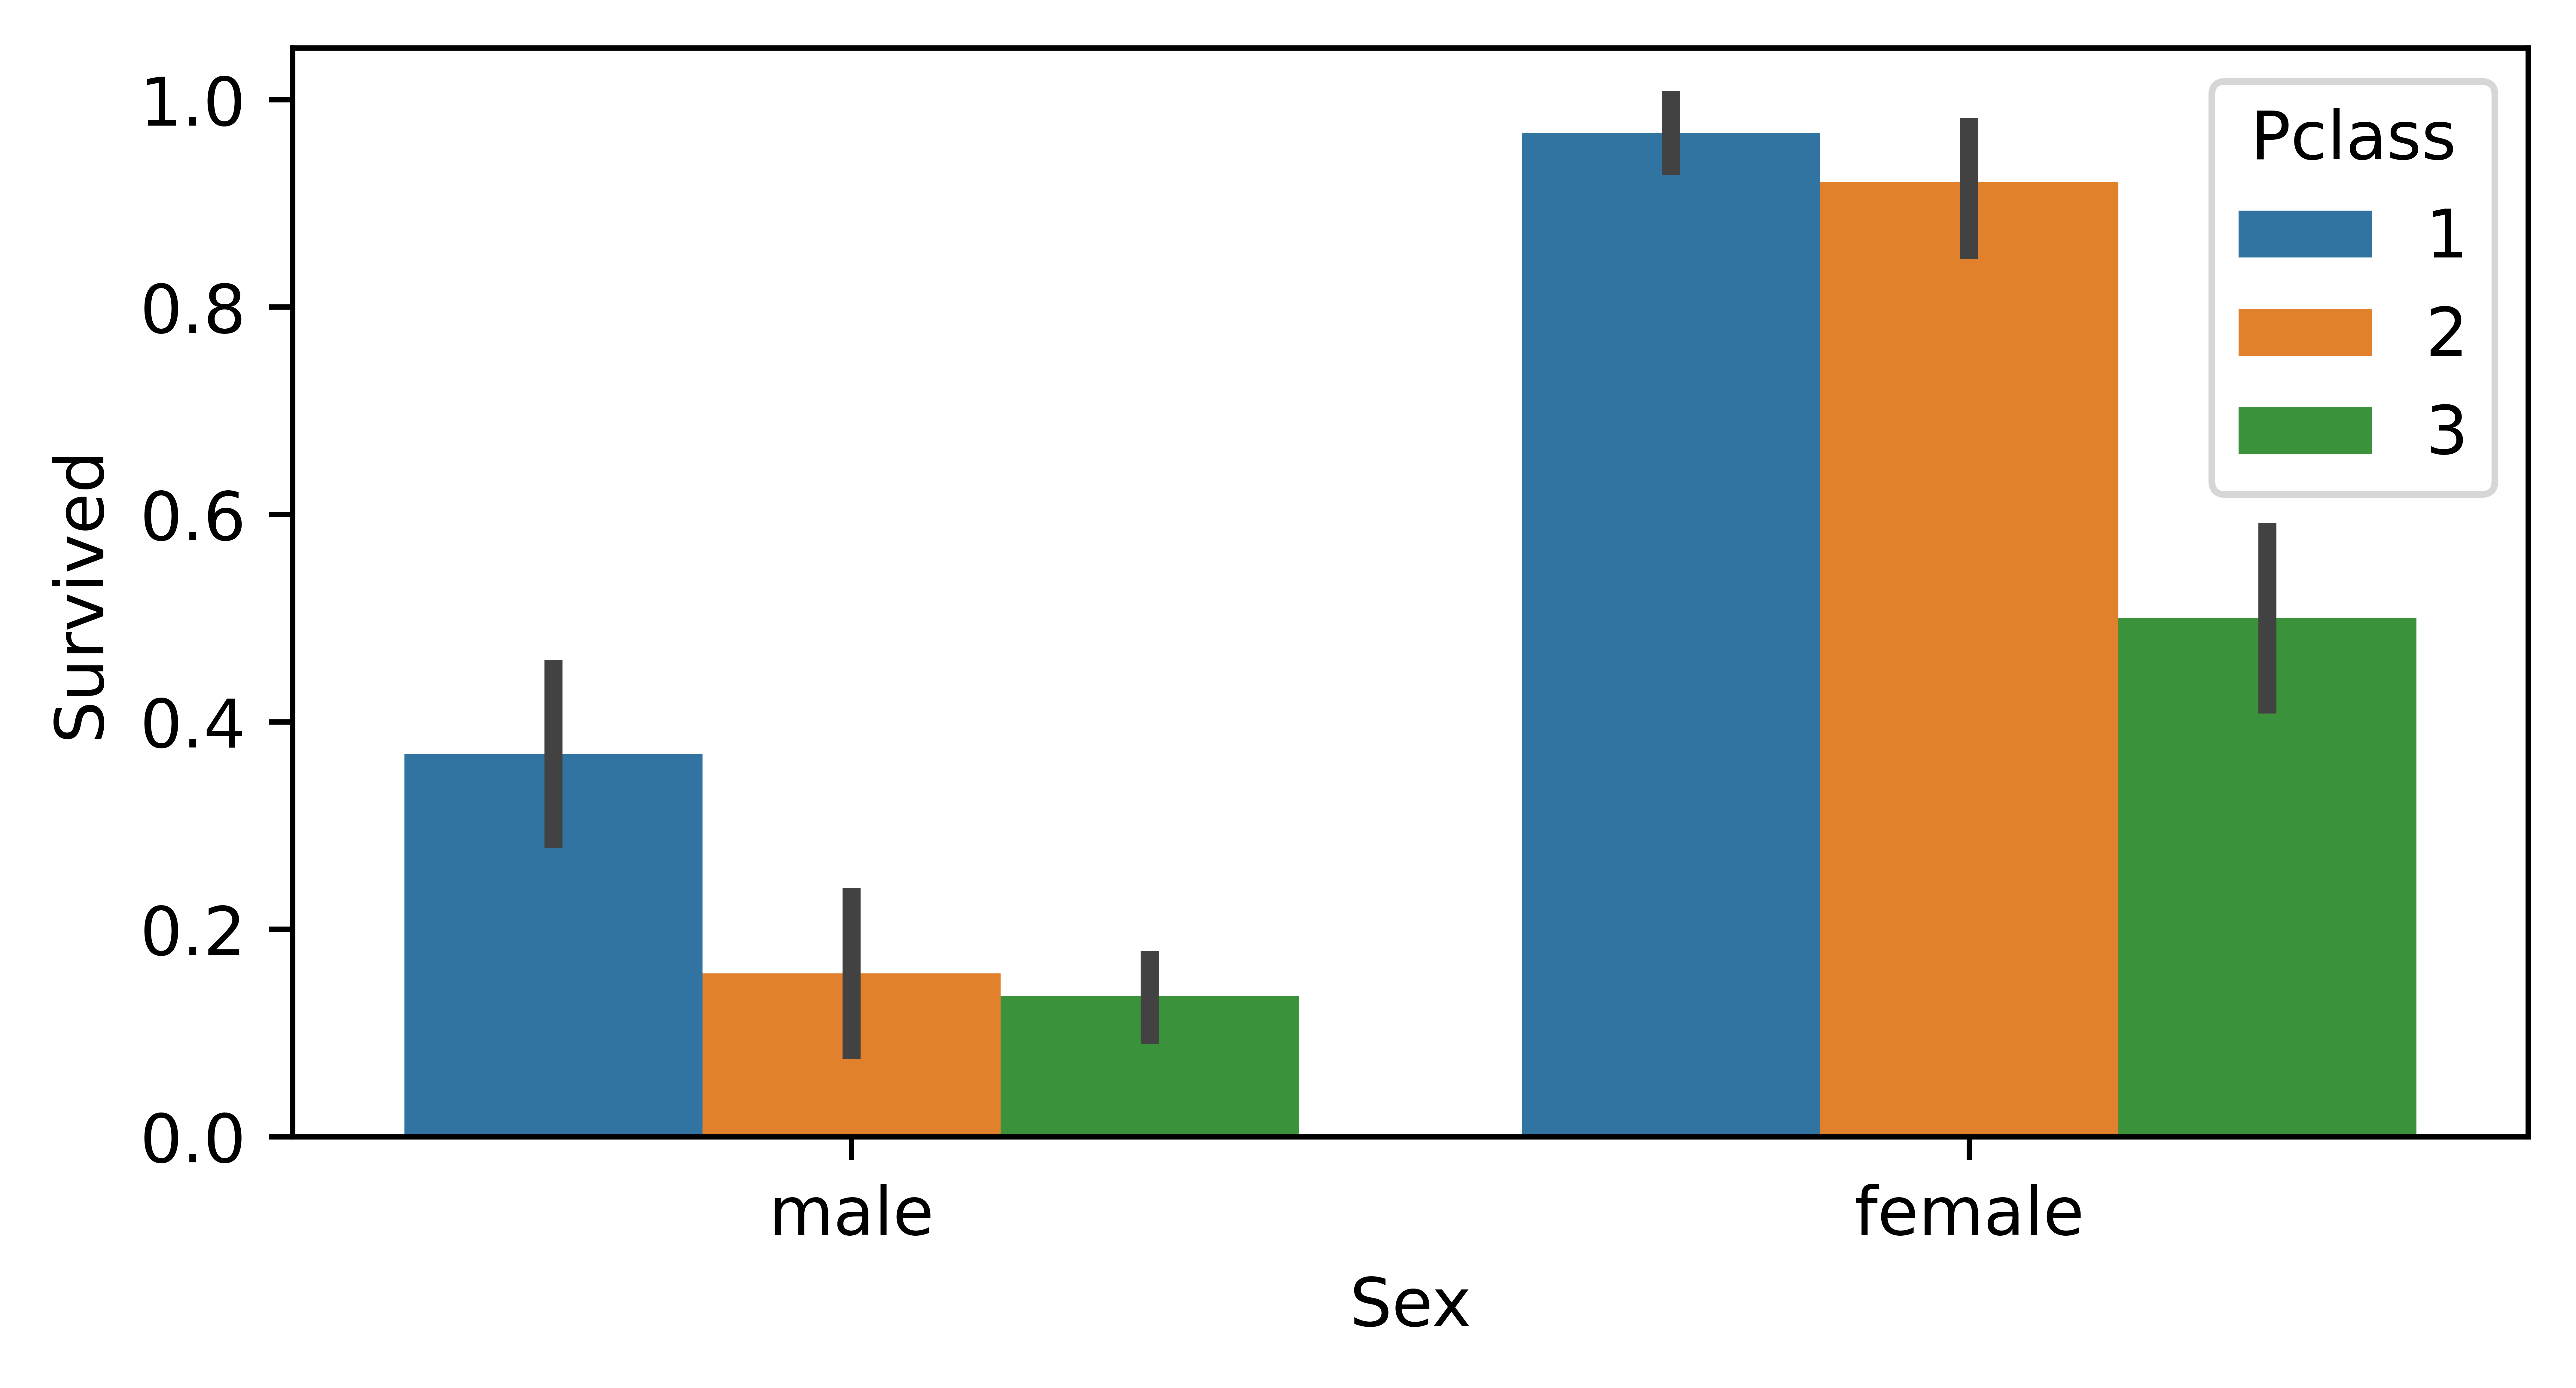

In [21]:
fig = plt.figure(figsize=(6,3), dpi=1600) 
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=data)

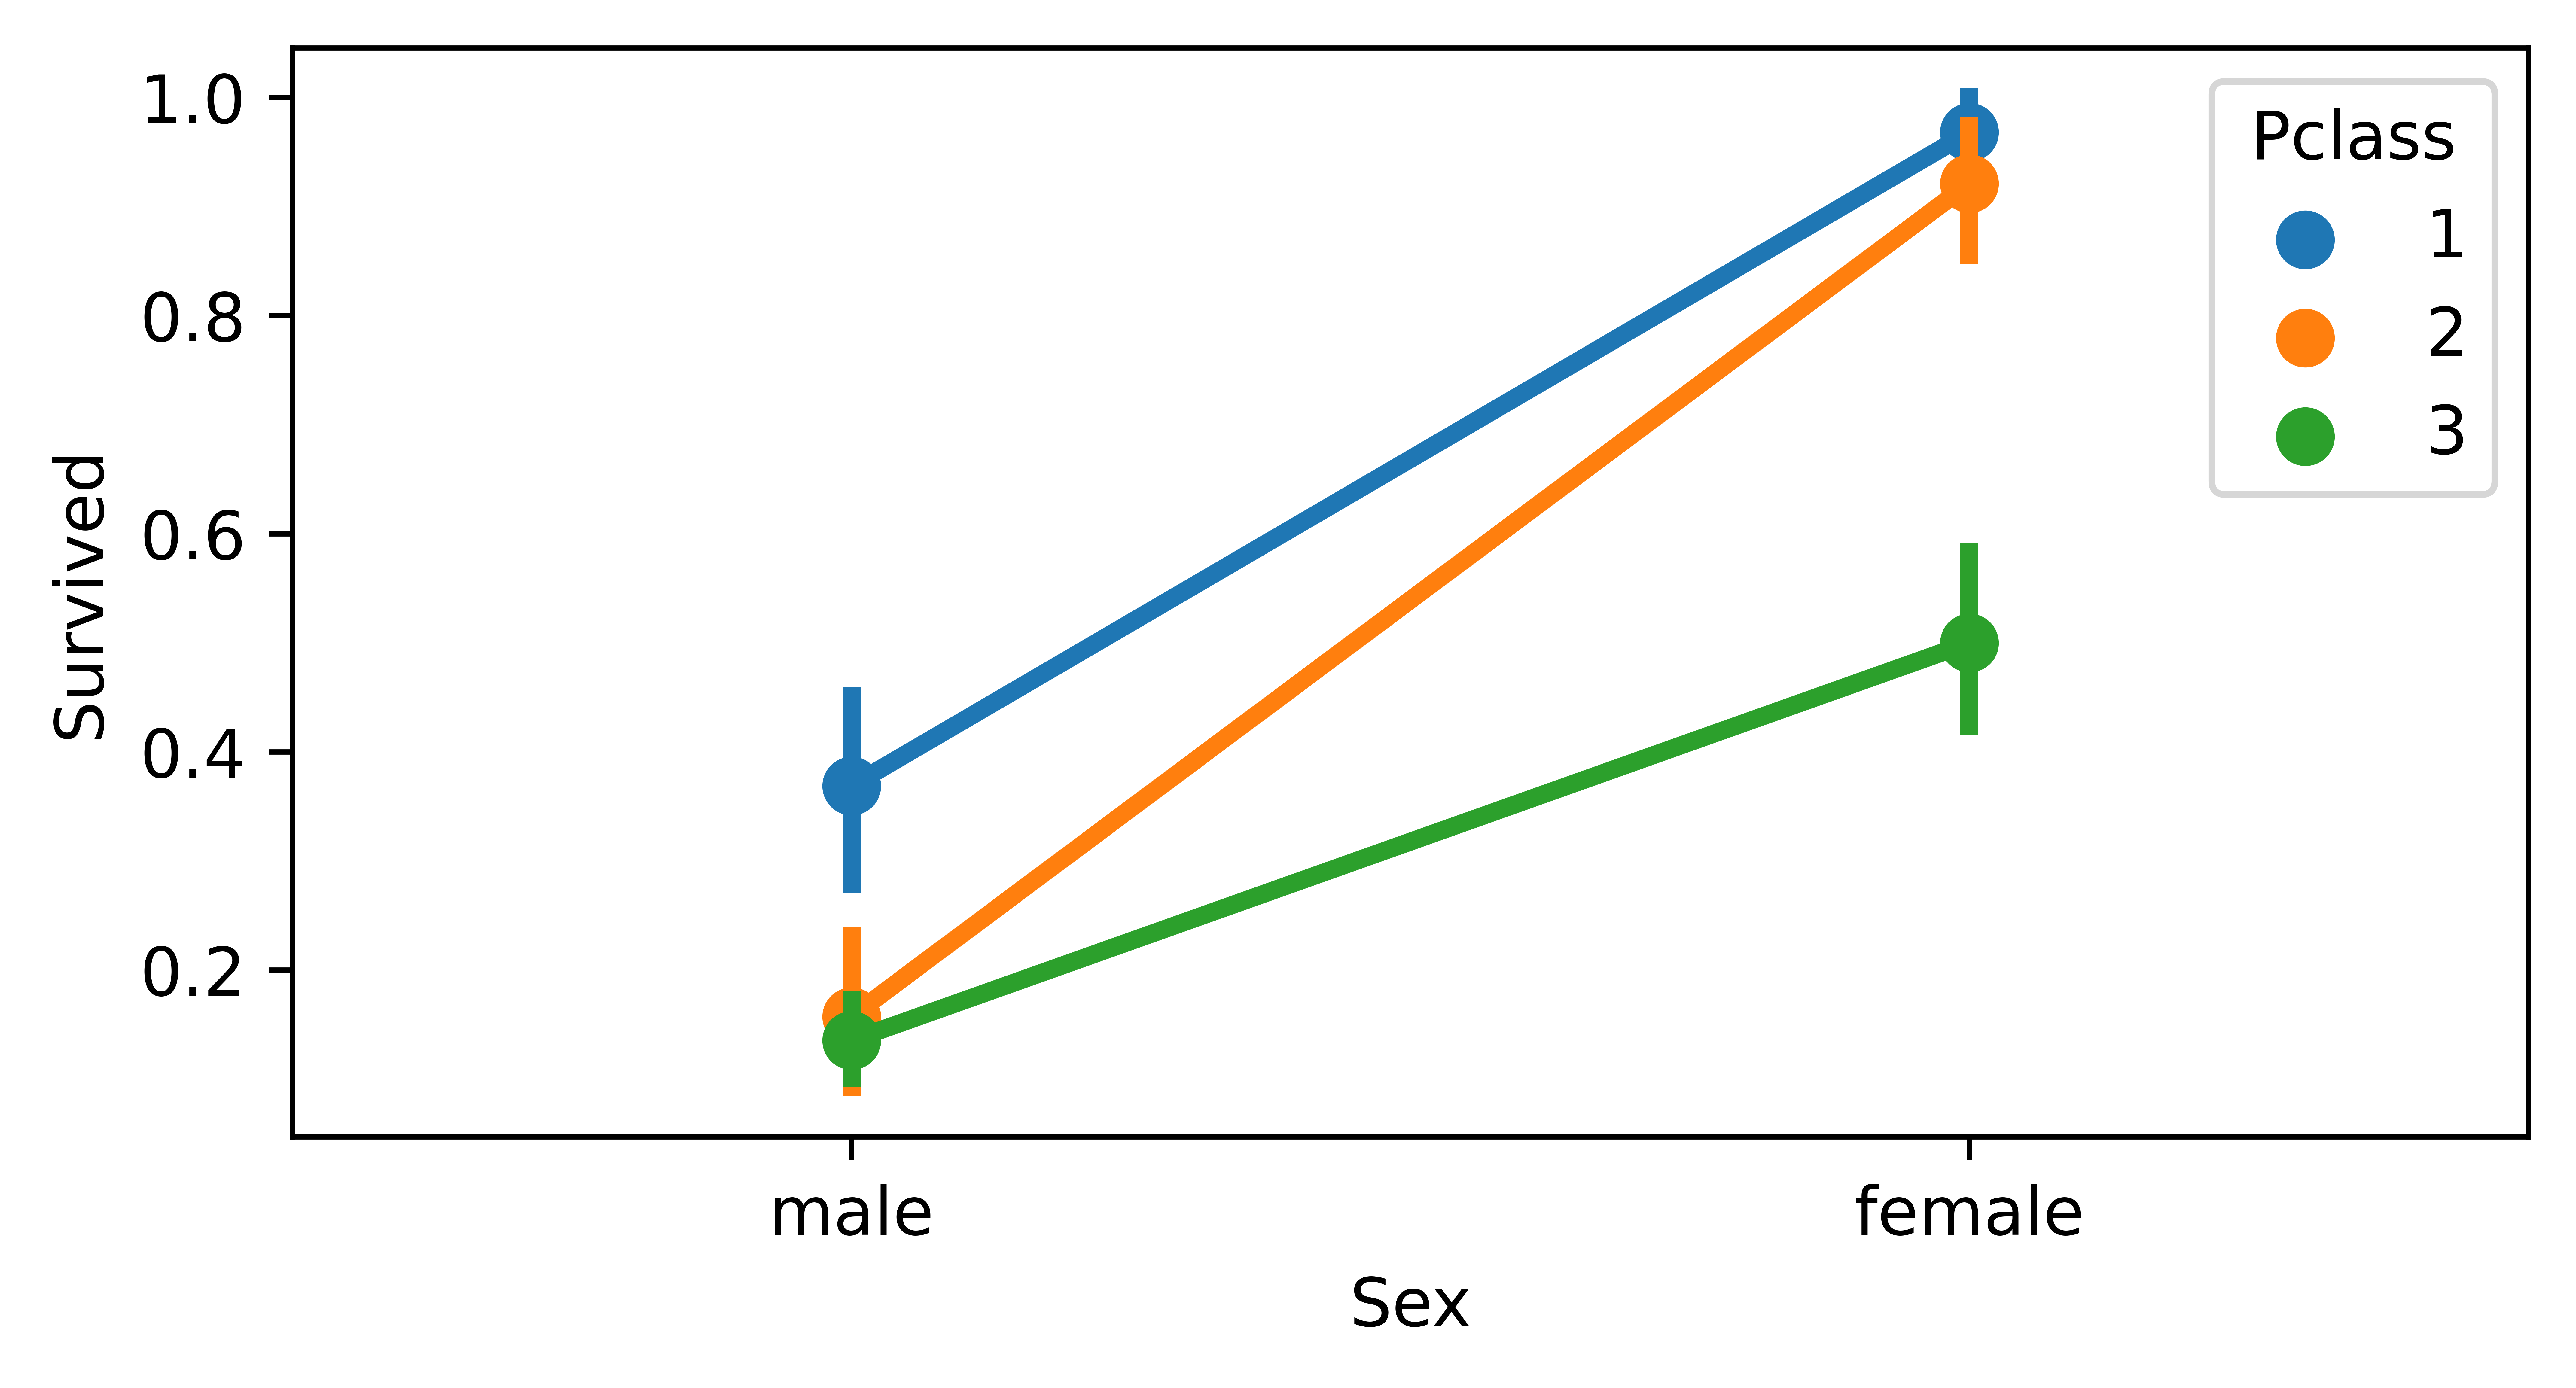

In [22]:
fig = plt.figure(figsize=(6,3), dpi=1600) 
sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=data)

## Preparing the data

#### Deal with the missing values

In [23]:
data["Age"] = data["Age"].fillna(data["Age"].mean())
data["Embarked"] = data["Embarked"].fillna("S")

#### Drop the useless columns

In [24]:
data.drop(["PassengerId","Name","Ticket","Cabin"], axis=1, inplace=True)

#### Create "dummies" columns for categorical variables

In [25]:
data = pd.concat([data.drop(["Sex", "Embarked"],axis=1), 
            pd.get_dummies(data["Sex"]), 
            pd.get_dummies(data["Embarked"])], axis=1)

In [26]:
data.head()

Survived  Pclass   Age  SibSp  Parch     Fare  female  male  C  Q  S
0         0       3  22.0      1      0   7.2500       0     1  0  0  1
1         1       1  38.0      1      0  71.2833       1     0  1  0  0
2         1       3  26.0      0      0   7.9250       1     0  0  0  1
3         1       1  35.0      1      0  53.1000       1     0  0  0  1
4         0       3  35.0      0      0   8.0500       0     1  0  0  1

## Train a machine learning algorithm

#### Separate the dataset between train and test sets

In [27]:
train, test = train_test_split(data, test_size=0.2)

In [28]:
test.head()

Survived  Pclass        Age  SibSp  Parch     Fare  female  male  C  Q  S
310         1       1  24.000000      0      0  83.1583       1     0  1  0  0
734         0       2  23.000000      0      0  13.0000       0     1  0  0  1
87          0       3  29.699118      0      0   8.0500       0     1  0  0  1
279         1       3  35.000000      1      1  20.2500       1     0  0  0  1
707         1       1  42.000000      0      0  26.2875       0     1  0  0  1

#### Train a simple model

In [29]:
model = LogisticRegression()

In [30]:
model.fit(train.drop("Survived", axis=1), train["Survived"])

/Users/nicolasgibaud/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Make predictions on the test set

In [31]:
y_pred = model.predict(test.drop("Survived", axis=1))

In [40]:
y_true = test["Survived"].values
results = pd.DataFrame({'y_true': y_true, 'y_pred':y_pred})

In [41]:
results.head(20)

y_true  y_pred
0        1       1
1        0       0
2        0       0
3        1       0
4        1       0
5        0       0
6        0       1
7        0       0
8        0       0
9        1       0
10       1       1
11       1       1
12       0       0
13       1       1
14       1       1
15       1       1
16       0       0
17       0       0
18       1       1
19       0       0

In [42]:
precision_score(results["y_true"], results["y_pred"])

0.7868852459016393

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(results["y_true"], results["y_pred"])

array([[94, 13],
       [24, 48]])

## Construire la courbe ROC

In [55]:
from sklearn.metrics import roc_curve, auc
def plot_auc(y_test, y_pred_prob):
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(12, 8))
    plt.plot(fpr, tpr, label='AUC: %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('1-Specificite')
    plt.ylabel('Sensibilite')
    plt.grid(True)
    plt.legend(loc="lower right")

In [56]:
y_pred_prob = model.predict_proba(test.drop("Survived", axis=1))[:,1]

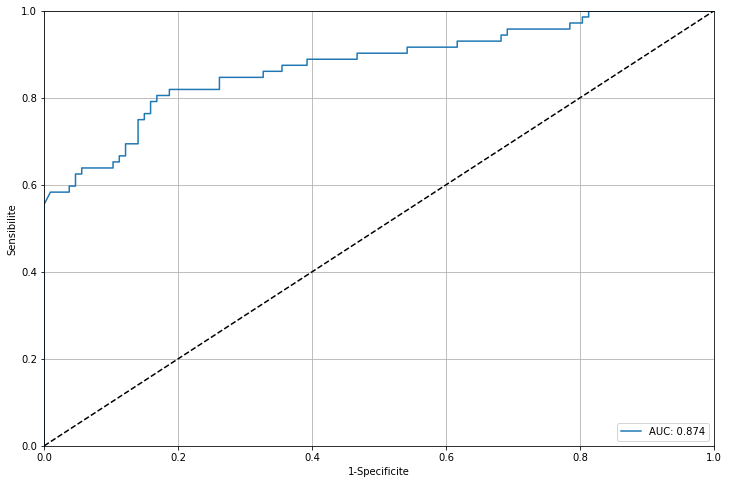

In [57]:
plot_auc(y_true, y_pred_prob)

## un autre modèle : le random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train.drop("Survived", axis=1), train.Survived)
y_pred = clf.predict((test.drop("Survived", axis=1)))
y_pred_prob = clf.predict_proba((test.drop("Survived", axis=1)))[:,1]


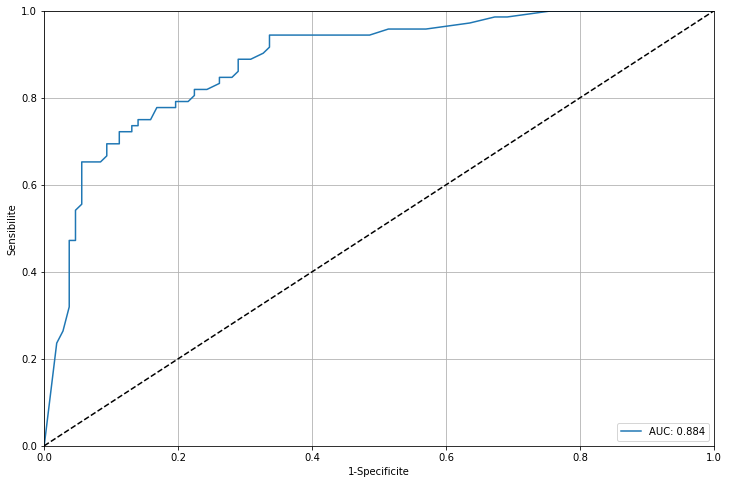

In [61]:
plot_auc(y_true, y_pred_prob)

## Optimisation des paramètres, le grid search

In [62]:
# Le grid search va nous permettre de tester un grand nombre de combinaisons de paramètres, afin de trouver
# celle qui donne les meilleurs résultats par validation croisée
from sklearn.model_selection import GridSearchCV
params_rf = {
    'n_estimators': [25, 50],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10]
}

rf = RandomForestClassifier()

grid = GridSearchCV(rf, params_rf, n_jobs=-1)  # n_jobs=-1 pour utiliser tous les processeurs
# On entraine le gridsearch comme un modèle, avec la méthode 'fit'
grid.fit(train.drop("Survived", axis=1), train.Survived)
y_pred = grid.predict(test.drop("Survived", axis=1))
y_pred_prob = clf.predict_proba(test.drop("Survived", axis=1))[:,1]

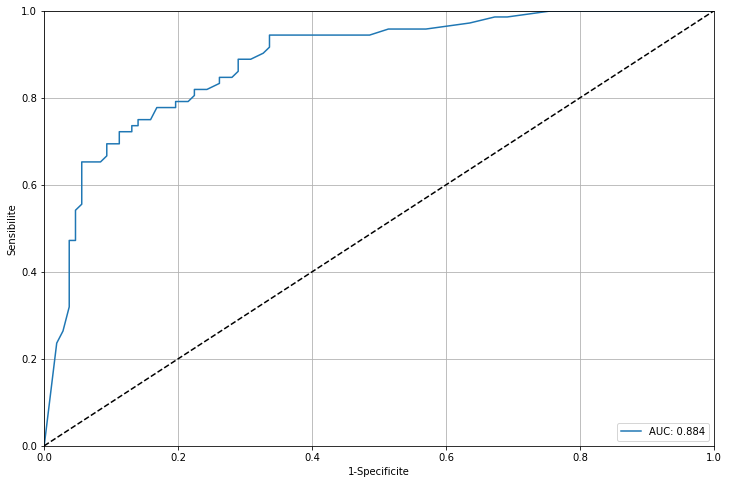

In [63]:
plot_auc(y_true, y_pred_prob)